# Econ 412 HW1
## Juntao Li
## 41988293

### 2.2)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('GDP&SP500.xlsx')
df

,GDP_growth,SP500_returns
0,1.804209,-2.978703
1,0.099724,-1.251436
2,0.592602,-8.437271
3,-0.324748,-12.913945
4,0.619467,5.373019
...,...,...
86,1.681478,10.117820
87,-0.411182,-5.073270
88,-0.144739,-17.966623
89,0.797963,-5.421481


In [2]:
df.describe()

,GDP_growth,SP500_returns
count,91.000000,91.000000
mean,0.488856,1.033873
std,1.380298,8.644673
min,-8.866004,-25.564368
25%,0.261107,-2.473941
50%,0.592602,2.336144
75%,0.824450,6.121485
max,7.561275,18.192875


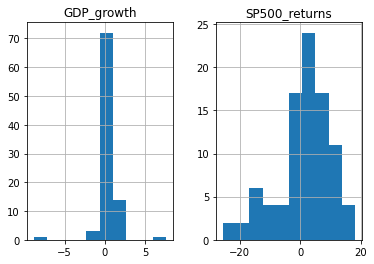

In [3]:
df.hist()
plt.show()

In [4]:
corr=df['GDP_growth'].corr(df['SP500_returns'])
print('Correlation coefficient is',corr)

Correlation coefficient is 0.13287820693319546


From the above statistics and plots, we can see that most quarters' GDP growth rates are around 0.5% and most quarters' SP500 returns are around 2%. Since the correlation is 0.13, these two series are weakly positively correlated.

### 2.3)

#### a)

In [5]:
import statsmodels.formula.api as smf
model1=smf.ols('GDP_growth~SP500_returns',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             GDP_growth   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.600
Date:                Fri, 14 Apr 2023   Prob (F-statistic):              0.209
Time:                        16:44:55   Log-Likelihood:                -157.14
No. Observations:                  91   AIC:                             318.3
Df Residuals:                      89   BIC:                             323.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4669      0.145      3.215      0.002       0.178       0.756
SP500_returns     0.0212      0.017      1.265      0.209      -0.012       0.055
==============================================================================
Omnibus:                       94.138   Durbin-Watson:                   2.546
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4257.565
Skew:                          -2.593   Prob(JB):                         0.00
Kurtosis:                      36.106   Cond. No.                         8.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### b)

In [6]:
df['lag1_SP500']=df['SP500_returns'].shift()
df['lag2_SP500']=df['SP500_returns'].shift(2)
df['lag3_SP500']=df['SP500_returns'].shift(3)
df['lag4_SP500']=df['SP500_returns'].shift(4)
df['lag1_GDPgrowth']=df['GDP_growth'].shift()
df

,GDP_growth,SP500_returns,lag1_SP500,lag2_SP500,lag3_SP500,lag4_SP500,lag1_GDPgrowth
0,1.804209,-2.978703,NaN,NaN,NaN,NaN,NaN
1,0.099724,-1.251436,-2.978703,NaN,NaN,NaN,1.804209
2,0.592602,-8.437271,-1.251436,-2.978703,NaN,NaN,0.099724
3,-0.324748,-12.913945,-8.437271,-1.251436,-2.978703,NaN,0.592602
4,0.619467,5.373019,-12.913945,-8.437271,-1.251436,-2.978703,-0.324748
...,...,...,...,...,...,...,...
86,1.681478,10.117820,0.233353,7.853970,5.612055,11.053978,0.654548
87,-0.411182,-5.073270,10.117820,0.233353,7.853970,5.612055,1.681478
88,-0.144739,-17.966623,-5.073270,10.117820,0.233353,7.853970,-0.411182
89,0.797963,-5.421481,-17.966623,-5.073270,10.117820,0.233353,-0.144739


In [7]:
model2=smf.ols('GDP_growth~lag1_SP500',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             GDP_growth   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     19.63
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           2.70e-05
Time:                        16:44:55   Log-Likelihood:                -147.19
No. Observations:                  90   AIC:                             298.4
Df Residuals:                      88   BIC:                             303.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4083      0.133      3.065      0.003       0.144       0.673
lag1_SP500     0.0680      0.015      4.431      0.000       0.038       0.099
==============================================================================
Omnibus:                       64.470   Durbin-Watson:                   2.528
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1541.851
Skew:                          -1.557   Prob(JB):                         0.00
Kurtosis:                      23.037   Cond. No.                         8.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### c)

In [8]:
model3=smf.ols('GDP_growth~lag1_SP500+lag2_SP500+lag3_SP500+lag4_SP500',data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             GDP_growth   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     5.477
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           0.000586
Time:                        16:44:55   Log-Likelihood:                -142.01
No. Observations:                  87   AIC:                             294.0
Df Residuals:                      82   BIC:                             306.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4065      0.142      2.864      0.005       0.124       0.689
lag1_SP500     0.0678      0.016      4.298      0.000       0.036       0.099
lag2_SP500    -0.0216      0.016     -1.377      0.172      -0.053       0.010
lag3_SP500     0.0195      0.016      1.211      0.229      -0.013       0.052
lag4_SP500     0.0004      0.016      0.027      0.979      -0.032       0.033
==============================================================================
Omnibus:                       66.393   Durbin-Watson:                   2.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1174.719
Skew:                          -1.829   Prob(JB):                    8.19e-256
Kurtosis:                      20.626   Cond. No.                         9.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### d)

In [9]:
model4=smf.ols('GDP_growth~lag1_SP500+lag2_SP500+lag3_SP500+lag4_SP500+lag1_GDPgrowth',data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             GDP_growth   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     5.812
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           0.000123
Time:                        16:44:56   Log-Likelihood:                -138.97
No. Observations:                  87   AIC:                             289.9
Df Residuals:                      81   BIC:                             304.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5053      0.144      3.513      0.001       0.219       0.791
lag1_SP500         0.0735      0.015      4.741      0.000       0.043       0.104
lag2_SP500        -0.0039      0.017     -0.231      0.818      -0.038       0.030
lag3_SP500         0.0138      0.016      0.873      0.385      -0.018       0.045
lag4_SP500         0.0060      0.016      0.375      0.709      -0.026       0.038
lag1_GDPgrowth    -0.2628      0.109     -2.420      0.018      -0.479      -0.047
==============================================================================
Omnibus:                       96.388   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1881.501
Skew:                          -3.283   Prob(JB):                         0.00
Kurtosis:                      24.815   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From above summaries of the four OLS models, model 1 has 0.018 R^2 and 0.07 adjusted R^2, model 2 has 0.182 R^2 and 0.173 adjusted R^2, model 3 has 0.211 R^2 and 0.172 adjusted R^2, and model 4 has 0.264 R^2 and 0.219 adjusted R^2. Since model 4 has highest R^2 and adjusted R^2 among all models, I prefer model 4. 

### 2.7)

In [10]:
df1 = pd.read_excel('b.2.7_dataset.xls')
df1['lag1_unemployed']=df1['Number of Unemployed'].shift()
df1['lag1_poverty']=df1['Number in Poverty'].shift()
df1['gr_unemployed']=(df1['lag1_unemployed']-df1['Number of Unemployed'])/df1['Number of Unemployed']
df1['gr_poverty']=(df1['lag1_poverty']-df1['Number in Poverty'])/df1['Number in Poverty']
df1

,Year,Number of Unemployed,Number in Poverty,lag1_unemployed,lag1_poverty,gr_unemployed,gr_poverty
0,1988,6953,31745,NaN,NaN,NaN,NaN
1,1989,6682,31528,6953.0,31745.0,0.040557,0.006883
2,1990,6752,33585,6682.0,31528.0,-0.010367,-0.061248
3,1991,8015,35708,6752.0,33585.0,-0.157580,-0.059454
4,1992,9283,38014,8015.0,35708.0,-0.136594,-0.060662
5,1993,9325,39265,9283.0,38014.0,-0.004504,-0.031860
6,1994,8630,38059,9325.0,39265.0,0.080533,0.031688
7,1995,7375,36425,8630.0,38059.0,0.170169,0.044859
8,1996,7491,36529,7375.0,36425.0,-0.015485,-0.002847
9,1997,7158,35574,7491.0,36529.0,0.046521,0.026845


In [11]:
df1[['gr_unemployed','gr_poverty']].describe()

,gr_unemployed,gr_poverty
count,18.000000,18.000000
mean,0.005285,-0.006922
std,0.107325,0.039458
min,-0.263872,-0.061248
25%,-0.033625,-0.039222
50%,0.029421,-0.000206
75%,0.075378,0.030477
max,0.170169,0.051386


In [12]:
corr1=df1['gr_unemployed'].corr(df1['gr_poverty'])
print('Correlation coefficient is',corr1)

Correlation coefficient is 0.7946669704157884


From the above statistics, we can see that most years' unemployed growth rates are around 0.03% and most years' poverty growth rates are around 0%. Since the correlation is 0.79, these two series are strongly positively correlated.

### 2.8)

In [13]:
#contemporaneous correlation
model5=smf.ols('gr_poverty~gr_unemployed',data=df1).fit()
model5.summary()

C:\xiazaidedongxi\Anaconda1\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gr_poverty   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     27.42
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           8.15e-05
Time:                        16:44:56   Log-Likelihood:                 42.144
No. Observations:                  18   AIC:                            -80.29
Df Residuals:                      16   BIC:                            -78.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0085      0.006     -1.453      0.166      -0.021       0.004
gr_unemployed     0.2922      0.056      5.236      0.000       0.174       0.410
==============================================================================
Omnibus:                        0.001   Durbin-Watson:                   1.766
Prob(Omnibus):                  1.000   Jarque-Bera (JB):                0.156
Skew:                           0.007   Prob(JB):                        0.925
Kurtosis:                       2.544   Cond. No.                         9.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
df1['lag1_gr_unemployed']=df1['gr_unemployed'].shift()
df1['lag2_gr_unemployed']=df1['gr_unemployed'].shift(2)
df1['lag3_gr_unemployed']=df1['gr_unemployed'].shift(3)
df1['lag4_gr_unemployed']=df1['gr_unemployed'].shift(4)
df1['lag1_gr_poverty']=df1['gr_poverty'].shift()
#one-year leading indicator
model6=smf.ols('gr_poverty~lag1_gr_unemployed',data=df1).fit()
model6.summary()

C:\xiazaidedongxi\Anaconda1\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gr_poverty   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     6.042
Date:                Fri, 14 Apr 2023   Prob (F-statistic):             0.0266
Time:                        16:44:56   Log-Likelihood:                 33.773
No. Observations:                  17   AIC:                            -63.55
Df Residuals:                      15   BIC:                            -61.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0076      0.009     -0.890      0.387      -0.026       0.011
lag1_gr_unemployed     0.2017      0.082      2.458      0.027       0.027       0.377
==============================================================================
Omnibus:                        3.363   Durbin-Watson:                   1.217
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                1.485
Skew:                          -0.350   Prob(JB):                        0.476
Kurtosis:                       1.732   Cond. No.                         9.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#four-year leading indicator
model7=smf.ols('gr_poverty~lag1_gr_unemployed+lag2_gr_unemployed+lag3_gr_unemployed+lag4_gr_unemployed',data=df1).fit()
model7.summary()

C:\xiazaidedongxi\Anaconda1\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gr_poverty   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     1.491
Date:                Fri, 14 Apr 2023   Prob (F-statistic):              0.284
Time:                        16:44:56   Log-Likelihood:                 31.052
No. Observations:                  14   AIC:                            -52.10
Df Residuals:                       9   BIC:                            -48.91
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0021      0.009      0.236      0.819      -0.018       0.022
lag1_gr_unemployed     0.1525      0.100      1.524      0.162      -0.074       0.379
lag2_gr_unemployed     0.0749      0.102      0.736      0.481      -0.155       0.305
lag3_gr_unemployed    -0.0892      0.100     -0.888      0.398      -0.317       0.138
lag4_gr_unemployed     0.0261      0.093      0.280      0.786      -0.185       0.237
==============================================================================
Omnibus:                        2.179   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.240
Skew:                          -0.427   Prob(JB):                        0.538
Kurtosis:                       1.818   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#four-year leading indicator with unemployed inertia
model8=smf.ols('gr_poverty~lag1_gr_unemployed+lag2_gr_unemployed+lag3_gr_unemployed+lag4_gr_unemployed+lag1_gr_poverty',data=df1).fit()
model8.summary()

C:\xiazaidedongxi\Anaconda1\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gr_poverty   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     1.435
Date:                Fri, 14 Apr 2023   Prob (F-statistic):              0.309
Time:                        16:44:56   Log-Likelihood:                 31.976
No. Observations:                  14   AIC:                            -51.95
Df Residuals:                       8   BIC:                            -48.12
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0035      0.009      0.389      0.707      -0.017       0.024
lag1_gr_unemployed     0.0032      0.172      0.019      0.986      -0.394       0.400
lag2_gr_unemployed     0.0369      0.107      0.345      0.739      -0.210       0.284
lag3_gr_unemployed    -0.1490      0.115     -1.301      0.230      -0.413       0.115
lag4_gr_unemployed     0.0377      0.093      0.403      0.697      -0.178       0.253
lag1_gr_poverty        0.5781      0.544      1.062      0.319      -0.677       1.833
==============================================================================
Omnibus:                        0.689   Durbin-Watson:                   1.490
Prob(Omnibus):                  0.709   Jarque-Bera (JB):                0.661
Skew:                          -0.411   Prob(JB):                        0.718
Kurtosis:                       2.323   Cond. No.                         65.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From above summaries of the four OLS models, model 5 has 0.631 R^2 and 0.608 adjusted R^2, model 6 has 0.287 R^2 and 0.240 adjusted R^2, model 7 has 0.398 R^2 and 0.131 adjusted R^2, and model 8 has 0.473 R^2 and 0.143 adjusted R^2. Since model 5 has highest R^2 and adjusted R^2 among all models, I prefer model 5.

### 3.1)

In [17]:
#Since the data for expenditure started from 2002, I will just use data from 2002 to 2023.
df2 = pd.read_excel('b.3.1_dataset.xls')
df2

,observation_date,RPC_expenditures,RDP_income
0,2002-01-01,9004.4,9951.9
1,2002-02-01,9040.1,9966.6
2,2002-03-01,9038.2,9973.3
3,2002-04-01,9086.5,10007.2
4,2002-05-01,9051.4,10047.9
...,...,...,...
249,2022-10-01,14263.3,15274.2
250,2022-11-01,14204.3,15332.9
251,2022-12-01,14176.9,15367.3
252,2023-01-01,14382.9,15591.1


#### a)

In [18]:
import numpy as np
df2['log_RPC_expenditures']=np.log(df2['RPC_expenditures'])
df2['log_RDP_income']=np.log(df2['RDP_income'])
df2['lag1_log_RPC_expenditures']=df2['log_RPC_expenditures'].shift()
df2['lag1_log_RDP_income']=df2['log_RDP_income'].shift()
df2['gr_RPC_expenditures']=df2['log_RPC_expenditures']-df2['lag1_log_RPC_expenditures']
df2['gr_RDP_income']=df2['log_RDP_income']-df2['lag1_log_RDP_income']
df2

,observation_date,RPC_expenditures,RDP_income,log_RPC_expenditures,log_RDP_income,lag1_log_RPC_expenditures,lag1_log_RDP_income,gr_RPC_expenditures,gr_RDP_income
0,2002-01-01,9004.4,9951.9,9.105469,9.205519,NaN,NaN,NaN,NaN
1,2002-02-01,9040.1,9966.6,9.109426,9.206995,9.105469,9.205519,0.003957,0.001476
2,2002-03-01,9038.2,9973.3,9.109215,9.207667,9.109426,9.206995,-0.000210,0.000672
3,2002-04-01,9086.5,10007.2,9.114545,9.211060,9.109215,9.207667,0.005330,0.003393
4,2002-05-01,9051.4,10047.9,9.110675,9.215119,9.114545,9.211060,-0.003870,0.004059
...,...,...,...,...,...,...,...,...,...
249,2022-10-01,14263.3,15274.2,9.565445,9.633920,9.562798,9.627220,0.002647,0.006700
250,2022-11-01,14204.3,15332.9,9.561300,9.637756,9.565445,9.633920,-0.004145,0.003836
251,2022-12-01,14176.9,15367.3,9.559369,9.639997,9.561300,9.637756,-0.001931,0.002241
252,2023-01-01,14382.9,15591.1,9.573795,9.654456,9.559369,9.639997,0.014426,0.014458


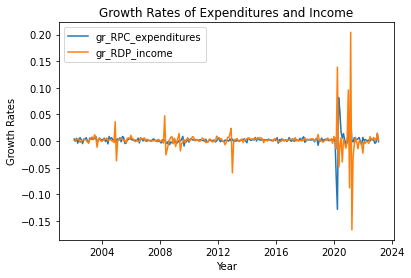

In [19]:
x = df2['observation_date']
y1 = df2['gr_RPC_expenditures']
y2 = df2['gr_RDP_income']

plt.plot(x, y1, label='gr_RPC_expenditures')
plt.plot(x, y2, label='gr_RDP_income')
plt.xlabel('Year')
plt.ylabel('Growth Rates')
plt.title('Growth Rates of Expenditures and Income')
plt.legend()
plt.show()

In [20]:
std_expenditures = np.std(df2['gr_RPC_expenditures'])
std_income = np.std(df2['gr_RDP_income'])
print('The standard deviation of RPC expenditures growth rate is', std_expenditures)
print('The standard deviation of RDP income growth rate is', std_income)

The standard deviation of RPC expenditures growth rate is 0.011949727423259723
The standard deviation of RDP income growth rate is 0.022269735086460785


We can see from above that RDP income growth rate has a higher level of standard deviation, so it has a higher volatility. 

The Permanent Income Hypothesis (PIH) is an economic theory that suggests that an individual's consumption is determined by their long-term average income rather than their current income. Since individuals tend to smooth their consumption based on their expected long-term income, changes in income that are perceived to be temporary or transitory, such as fluctuations in stock prices or temporary tax rebates, will not have a significant impact on consumption. These temporary changes are counted into income growth rate volatility but not in expendture growth rate volatility. So the volatility of real PCE growth rate is higher than the volatility of real DPI growth rate.

#### b)

In [21]:
model_expenditure=smf.ols('gr_RPC_expenditures~gr_RDP_income',data=df2).fit()
model_expenditure.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     gr_RPC_expenditures   R-squared:                       0.017
Model:                             OLS   Adj. R-squared:                  0.013
Method:                  Least Squares   F-statistic:                     4.273
Date:                 Fri, 14 Apr 2023   Prob (F-statistic):             0.0398
Time:                         16:44:58   Log-Likelihood:                 763.19
No. Observations:                  253   AIC:                            -1522.
Df Residuals:                      251   BIC:                            -1515.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0020      0.001      2.626      0.009       0.000       0.003
gr_RDP_income    -0.0694      0.034     -2.067      0.040      -0.136      -0.003
==============================================================================
Omnibus:                      237.823   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31720.268
Skew:                          -3.014   Prob(JB):                         0.00
Kurtosis:                      57.523   Cond. No.                         44.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient and the intercept in above regression shows that when the growth rate of RDP_income increases by 1%, the growth rate of RCP_expenditures is expected to decrease by 0.07%, and when the growth rate of RDP-income is 0%, the growth rate of RCP_expenditure is expected to be 0.2%. Since the p-value for gr_RDP_income is 0.04, which is less than 0.05, the growth rate of RDP_income is statistically significant.

#### c)

In [22]:
df2['lag1_gr_RDP_income']=df2['gr_RDP_income'].shift()
model_lag_expenditure=smf.ols('gr_RPC_expenditures~gr_RDP_income+lag1_gr_RDP_income',data=df2).fit()
model_lag_expenditure.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     gr_RPC_expenditures   R-squared:                       0.017
Model:                             OLS   Adj. R-squared:                  0.009
Method:                  Least Squares   F-statistic:                     2.124
Date:                 Fri, 14 Apr 2023   Prob (F-statistic):              0.122
Time:                         16:44:58   Log-Likelihood:                 759.69
No. Observations:                  252   AIC:                            -1513.
Df Residuals:                      249   BIC:                            -1503.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0020      0.001      2.560      0.011       0.000       0.003
gr_RDP_income         -0.0674      0.040     -1.693      0.092      -0.146       0.011
lag1_gr_RDP_income     0.0038      0.040      0.095      0.924      -0.075       0.082
==============================================================================
Omnibus:                      238.217   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31535.483
Skew:                          -3.044   Prob(JB):                         0.00
Kurtosis:                      57.464   Cond. No.                         65.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since in the model in c), the p-values for the two variables are 0.092 and 0.924, which are above 0.05, these two variables are statistically insignificant. However, when there is no adjustment lag in the model as b), the variable is statistically significant, so I think there is very low possibility of such an adjustment lag in consumption growth.

### 3.3)

#### a)

In [23]:
df3 = pd.read_excel('real GDP.xls')
df3

,observation_date,GDP
0,1947-01-01,2036.20400
1,1948-01-01,2119.95925
2,1949-01-01,2107.99900
3,1950-01-01,2291.11050
4,1951-01-01,2475.44875
...,...,...
71,2018-01-01,18609.07825
72,2019-01-01,19036.05225
73,2020-01-01,18509.14275
74,2021-01-01,19609.81175


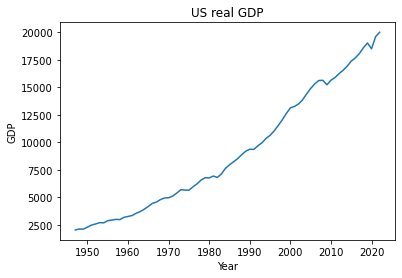

In [24]:
plt.plot(df3['observation_date'],df3['GDP'])
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('US real GDP')
plt.show()

US Real GDP refers to the inflation-adjusted measure of the value of all goods and services produced within the United States over a given period. The periodicity is annually. And the unit is measured in billions of 2012 dollars. I think the stochastic process is not stationary at all since all the different variables at different time do not have the same mean.

#### b)

In [25]:
df4 = pd.read_excel('yen to dollar.xls')
df4.head()

,observation_date,Exchange Rate
0,1971-01-01,347.78569
1,1972-01-01,303.12498
2,1973-01-01,271.30548
3,1974-01-01,291.84460
4,1975-01-01,296.78488


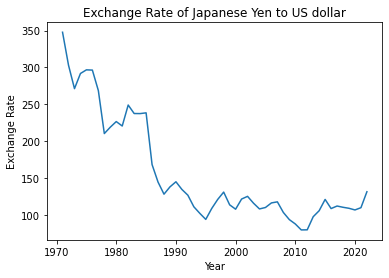

In [26]:
plt.plot(df4['observation_date'],df4['Exchange Rate'])
plt.xlabel('Year')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate of Japanese Yen to US dollar')
plt.show()

The exchange rate of Japanese yen to US dollar refers to the value of one Japanese yen in terms of US dollars. The periodicity is annually. And the unit is measured in percentage. I think the stochastic process is also nonstationary since different variables at different times do not have same mean even though the exchange rate is fluctuating all the time. The overall trend of exchange rate indicates the nonstationarity. 

#### c)

In [27]:
df5 = pd.read_excel('10-year us treasury maturity yield.xls')
df5.head()

,observation_date,Maturity Yield
0,1962-01-01,3.946064
1,1963-01-01,4.001566
2,1964-01-01,4.187360
3,1965-01-01,4.283695
4,1966-01-01,4.925040


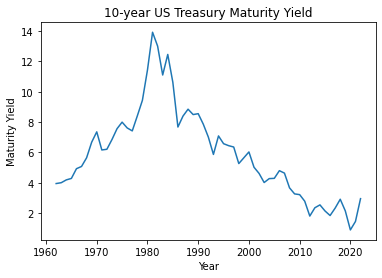

In [28]:
plt.plot(df5['observation_date'],df5['Maturity Yield'])
plt.xlabel('Year')
plt.ylabel('Maturity Yield')
plt.title('10-year US Treasury Maturity Yield')
plt.show()

The 10-year US Treasury maturity yield refers to the interest rate that is paid on a 10-year US Treasury note, which is a debt security issued by the US Department of the Treasury to finance government operations and programs. The periodicity is annually. And the unit is measured in percentage. I think the stochastic process is still nonstationary since different variables at different times do not have same mean even though the maturity yield is fluctuating all the time. We can see a peak maturity yield around 1982 and the lowest yield is in 2020. It is hard to say that the mean remains constant during such large time interval.

#### d)

In [29]:
df6 = pd.read_excel('unemployment rate.xls')
df6.head()

,observation_date,Unemployment
0,1948-01-01,3.750000
1,1949-01-01,6.050000
2,1950-01-01,5.208333
3,1951-01-01,3.283333
4,1952-01-01,3.025000


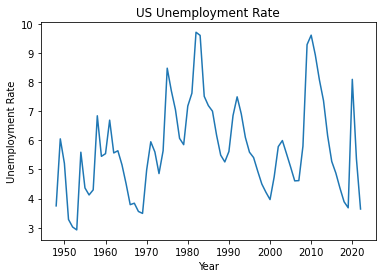

In [30]:
plt.plot(df6['observation_date'],df6['Unemployment'])
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('US Unemployment Rate')
plt.show()

The US unemployment rate refers to the percentage of the total labor force in the United States that is currently unemployed and actively seeking employment. The periodicity is annually. And the unit is measured in percentage. I think the stochastic process is first order stationary since the unemployment rate is fluctuating all the time and the mean of unemployment rate seems to stay in a certain interval. However, there are small fluctuations and large fluctuations, which means the variances of different variables at different time are not the same. So it is only first order stationary, not second order stationary.

### 3.5)

In [31]:
dates = ['2001-01-01', '2001-04-01', '2001-07-01', '2001-10-01', 
         '2002-01-01', '2002-04-01', '2002-07-01', '2002-10-01', 
         '2003-01-01', '2003-04-01', '2003-07-01', '2003-10-01', 
         '2004-01-01', '2004-04-01', '2004-07-01', '2004-10-01']
gdp = [10021.5, 10128.9, 10135.1, 10226.3, 10338.2, 10445.7, 10546.5, 10617.5, 
       10744.6, 10884.0, 11116.7, 11270.9, 11472.6, 11657.5, 11814.9, 11994.8]

df7 = pd.DataFrame({'observation_date':dates,'GDP': gdp})
df7['observation_date'] = pd.to_datetime(df7['observation_date'])
df7

,observation_date,GDP
0,2001-01-01,10021.5
1,2001-04-01,10128.9
2,2001-07-01,10135.1
3,2001-10-01,10226.3
4,2002-01-01,10338.2
5,2002-04-01,10445.7
6,2002-07-01,10546.5
7,2002-10-01,10617.5
8,2003-01-01,10744.6
9,2003-04-01,10884.0


#### a)

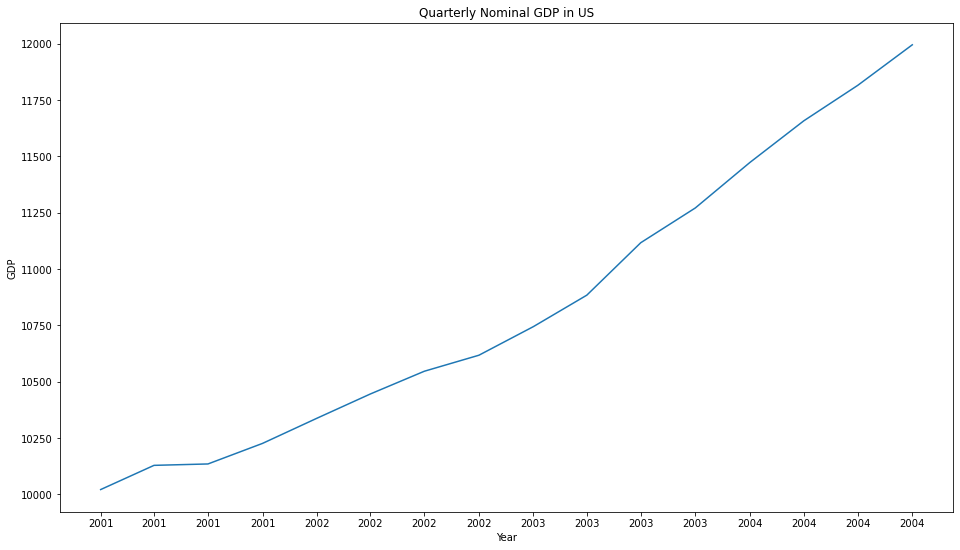

In [32]:
plt.figure(figsize=(16,9))
plt.plot(df7['observation_date'],df7['GDP'])
plt.xticks(df7['observation_date'], df7['observation_date'].dt.strftime('%Y'))
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Quarterly Nominal GDP in US')
plt.show()

I think the stochastic process cannot be weakly stationary of any order since the GDP is increasing all the time and it is very hard to say the mean GDPs of different variables at different times are the same.

#### b)

In [33]:
df7['lag1_GDP']=df7['GDP'].shift()
df7['gr_GDP']=100*(df7['GDP']-df7['lag1_GDP'])/df7['lag1_GDP']
df7

,observation_date,GDP,lag1_GDP,gr_GDP
0,2001-01-01,10021.5,NaN,NaN
1,2001-04-01,10128.9,10021.5,1.071696
2,2001-07-01,10135.1,10128.9,0.061211
3,2001-10-01,10226.3,10135.1,0.899843
4,2002-01-01,10338.2,10226.3,1.094237
5,2002-04-01,10445.7,10338.2,1.039833
6,2002-07-01,10546.5,10445.7,0.964990
7,2002-10-01,10617.5,10546.5,0.673209
8,2003-01-01,10744.6,10617.5,1.197080
9,2003-04-01,10884.0,10744.6,1.297396


#### c)

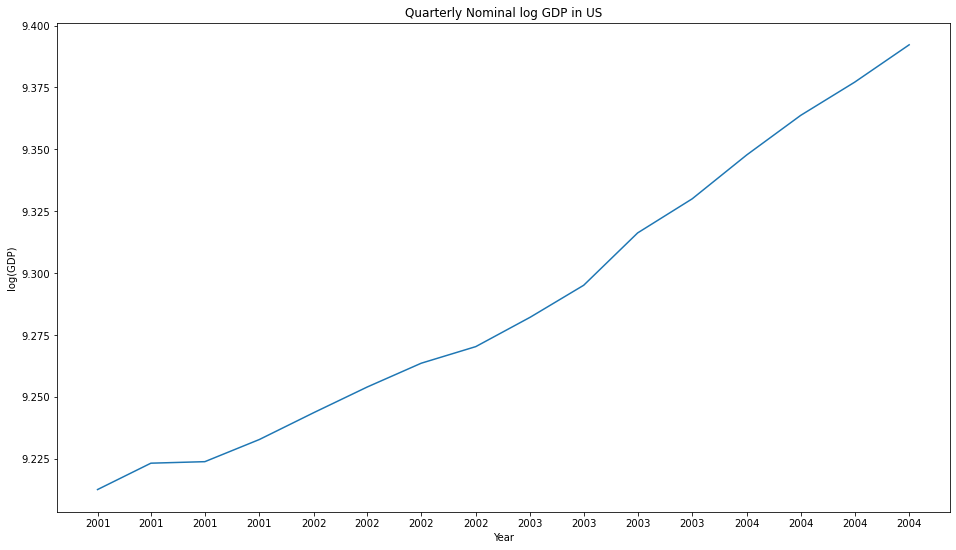

In [34]:
df7['log_GDP']=np.log(df7['GDP'])
plt.figure(figsize=(16,9))
plt.plot(df7['observation_date'],df7['log_GDP'])
plt.xticks(df7['observation_date'], df7['observation_date'].dt.strftime('%Y'))
plt.xlabel('Year')
plt.ylabel('log(GDP)')
plt.title('Quarterly Nominal log GDP in US')
plt.show()


For the plot above, it looks very similar to the plot in part a) and I still do not think it is stationary since the log(GDP) is increasing as time passes from 2001 to 2004. It does not seem like the mean of GDP of different variables at different times are the same. For smoothness, the curve seems quite smooth because there are not many fluctuations, just like the plot in part a).

#### d)

In [35]:
df7['lag1_log_GDP']=df7['log_GDP'].shift()
df7['gr_log_GDP']=100*(df7['log_GDP']-df7['lag1_log_GDP'])
df7

,observation_date,GDP,lag1_GDP,gr_GDP,log_GDP,lag1_log_GDP,gr_log_GDP
0,2001-01-01,10021.5,NaN,NaN,9.212488,NaN,NaN
1,2001-04-01,10128.9,10021.5,1.071696,9.223148,9.212488,1.065994
2,2001-07-01,10135.1,10128.9,0.061211,9.223760,9.223148,0.061192
3,2001-10-01,10226.3,10135.1,0.899843,9.232718,9.223760,0.895819
4,2002-01-01,10338.2,10226.3,1.094237,9.243601,9.232718,1.088294
5,2002-04-01,10445.7,10338.2,1.039833,9.253946,9.243601,1.034464
6,2002-07-01,10546.5,10445.7,0.964990,9.263549,9.253946,0.960364
7,2002-10-01,10617.5,10546.5,0.673209,9.270259,9.263549,0.670953
8,2003-01-01,10744.6,10617.5,1.197080,9.282159,9.270259,1.189972
9,2003-04-01,10884.0,10744.6,1.297396,9.295049,9.282159,1.289052


#### e)

The results for growth rate calculated in part b) and d) are quite similar, but I notice that the growth rates in part d) are a bit smaller than the growth rates calculated in part b). Using the difference of logs is the approximation of the common way to compute growth rate, so it is normal to find small differences between them. 